In [119]:
import pandas as pd
import numpy as np
br=pd.read_csv('C:/Users/Faisal/R5_Residency/R5_Project/Project_Data/Qualitative_Bankruptcy.data.txt',delimiter=',',names=('Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'))

In [120]:
br.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [121]:
#P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy

In [122]:
br.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

In [123]:
print(br["Class"].value_counts())
br.shape

NB    143
B     107
Name: Class, dtype: int64


(250, 7)

In [124]:
#Question 1
print('The given input file is imported and it is observed that there are 6 features \nthat decides the target variable Class - Bankruptcy and Non-Bankruptcy instances ')

The given input file is imported and it is observed that there are 6 features 
that decides the target variable Class - Bankruptcy and Non-Bankruptcy instances 


In [127]:
#Question 2 : Encoding independent features

from sklearn.preprocessing import OneHotEncoder 

x=br.drop('Class',axis=1)
y=br.Class
x = pd.get_dummies(x)
x.head(5)

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [129]:
#Question 3 - Separation of independent and dependent variables
print (y.head(5))
print (x.head(3))

0    NB
1    NB
2    NB
3    NB
4    NB
Name: Class, dtype: object
   Industrial Risk_A  Industrial Risk_N  Industrial Risk_P  Management Risk_A  \
0                  0                  0                  1                  0   
1                  0                  1                  0                  0   
2                  1                  0                  0                  1   

   Management Risk_N  Management Risk_P  Financial Flexibility_A  \
0                  0                  1                        1   
1                  1                  0                        1   
2                  0                  0                        1   

   Financial Flexibility_N  Financial Flexibility_P  Credibility_A  \
0                        0                        0              1   
1                        0                        0              1   
2                        0                        0              1   

   Credibility_N  Credibility_P  Competitiveness_A  Co

In [130]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [131]:
# Question 4 - Splitting the data in train-test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)

In [132]:
# Question 5 Apply PCA on independent features of training data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [133]:
x_std = StandardScaler().fit_transform(x_train)
cov_matrix = np.cov(x_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00502513e+00 -5.47050073e-01 -4.71826432e-01  2.46917670e-01
  -2.84805650e-01  7.60713041e-02  2.30634221e-02  3.32528991e-02
  -6.33642464e-02  1.39425166e-02 -1.28282955e-01  1.19815923e-01
   6.94348141e-02 -1.20895091e-01  6.31641834e-02  2.08904000e-01
  -1.70903675e-01 -9.59206447e-03]
 [-5.47050073e-01  1.00502513e+00 -4.87589823e-01 -3.16928754e-01
   4.20624835e-01 -1.61628241e-01 -6.64461773e-02  1.50186828e-01
  -1.04914868e-01  1.53925016e-02  8.64987905e-02 -1.05475350e-01
  -9.67892455e-02  3.21259143e-01 -2.45828940e-01 -5.58892287e-02
   2.04414732e-01 -1.65403174e-01]
 [-4.71826432e-01 -4.87589823e-01  1.00502513e+00  7.61967452e-02
  -1.45846739e-01  9.08240949e-02  4.58960160e-02 -1.92738616e-01
   1.76475752e-01 -3.07344662e-02  4.26763223e-02 -1.38770343e-02
   2.94966415e-02 -2.12117603e-01  1.92902178e-01 -1.58931379e-01
  -3.70072439e-02  1.84090822e-01]
 [ 2.46917670e-01 -3.16928754e-01  7.61967452e-02  1.00502513e+00
  -5.93150125e-

C:\Users\Faisal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


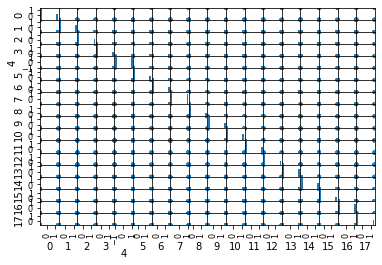

In [134]:
x_std_df = pd.DataFrame(x_std)
axes = pd.plotting.scatter_matrix(x_std_df)
plt.tight_layout()

In [139]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [138]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.09495896  0.37708828  0.35102647 -0.19697842 -0.05990036  0.13334692
   0.13449415  0.27649357 -0.18965253 -0.39121285  0.19855996  0.04768834
   0.51833911 -0.17541505  0.06499327 -0.09655973  0.05587188  0.00181164]
 [-0.20346532 -0.35409439 -0.17916276 -0.28668693  0.1517611   0.07022177
  -0.14233808  0.09563121 -0.08282027  0.28038916 -0.46607723 -0.10978134
   0.52338952 -0.17712419  0.06562653 -0.09750055  0.05641627  0.00182929]
 [ 0.11517094 -0.020372   -0.17732706  0.50707311 -0.09729482 -0.21290842
   0.00962196 -0.38886541  0.28486041  0.1126723   0.28358736  0.06583926
   0.49726667 -0.16828376  0.06235105 -0.09263421  0.05360048  0.00173799]
 [ 0.10079008  0.48089923 -0.07679399  0.03875432  0.03708563 -0.17813581
   0.25147879 -0.058338    0.18209165  0.02373285 -0.54595334  0.08774205
  -0.01243427  0.06297911  0.03611267  0.2885056   0.44078183  0.28050627]
 [-0.25612021 -0.25211428 -0.14561351 -0.26996291 -0.03640631  0.02060756
  -0.27176673 -0

In [140]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [141]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.08589156  37.13979327  47.5186413   57.38916297  65.92465381
  73.64883091  80.66157592  86.65497906  91.71707009  96.25340489
  98.74901124 100.         100.         100.         100.
 100.         100.         100.        ]


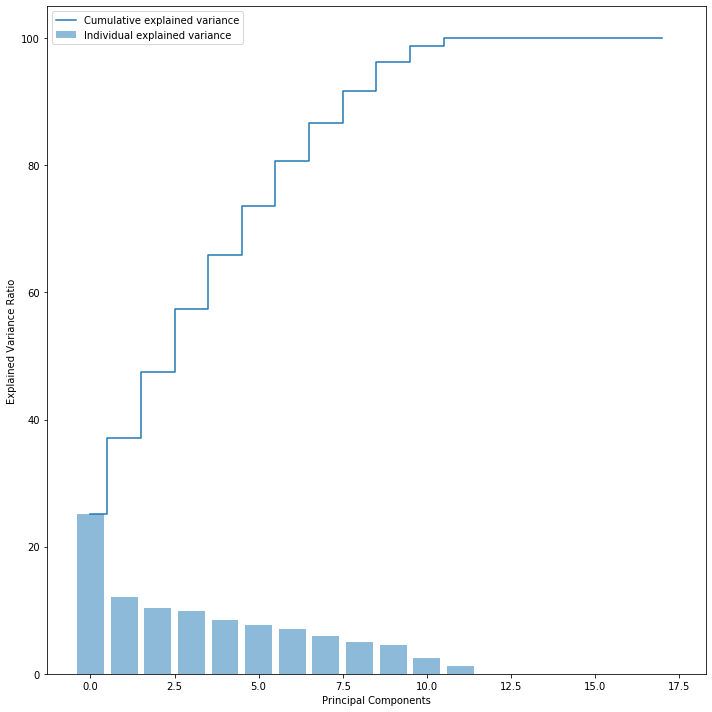

In [143]:
#Question 6 
plt.figure(figsize=(10 , 10))
plt.bar(range(18), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [149]:
print ('Selecting 10 components preserve 96.25 % of total variance of data. So number of principal compneents should be 10')

Selecting 10 components preserve 96.25 % of total variance of data. So number of principal compneents should be 10


In [144]:
# Question 7 
pca=PCA(n_components=10) 
pca.fit(x_train) 
x_pca=pca.transform(x_train) 

In [150]:
print ("shape of x_pca", x_pca.shape)

shape of x_pca (200, 10)


In [146]:
#Question 8 - Kmeans Algorithm
Cluster_error = []

In [164]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10 )
Cluster_error = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(x_pca)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Cluster_error": Cluster_error } )
clusters_df[0:10]

,num_clusters,Cluster_error
0,1,748.772593
1,2,565.458481
2,3,505.649574
3,4,460.579420
4,5,425.671895
5,6,397.211732
6,7,369.685025
7,8,356.236631
8,9,336.526896


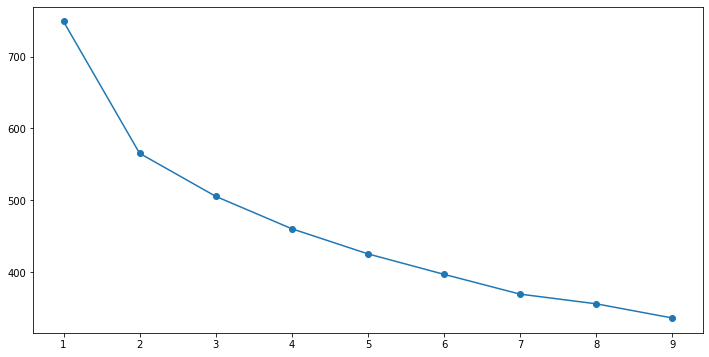

In [165]:
# Question 9 - Optimal Number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Cluster_error, marker = "o" )

In [151]:
print ('The slope is sharp till 2 clusters and getting flattened 3 onwards. Hence 2 should be the optimal number of clusters')

The slope is sharp till 2 clusters and getting flattened 3 onwards. Hence 2 should be the optimal number of clusters


In [166]:
kmeans = KMeans(n_clusters=2, n_init = 10, random_state=2)
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [168]:
#Question 10 - Matching the luster with the target variable class
br_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
br_labels['labels'] = br_labels['labels'].astype('category')
br_df_labeled = x_train.join(br_labels).join(y_train)
print (br_df_labeled)

     Industrial Risk_A  Industrial Risk_N  Industrial Risk_P  \
228                  1                  0                  0   
85                   1                  0                  0   
112                  0                  1                  0   
148                  0                  1                  0   
171                  1                  0                  0   
117                  0                  0                  1   
118                  0                  0                  1   
28                   0                  0                  1   
16                   0                  1                  0   
130                  1                  0                  0   
181                  0                  1                  0   
150                  0                  1                  0   
172                  0                  0                  1   
189                  1                  0                  0   
47                   1                  

In [172]:
#Question 11 
pca.fit(x_test) 
x_pca_test=pca.transform(x_test)
kmeans.fit(x_pca_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [173]:
# Question 12
from sklearn.cluster import KMeans
cluster_range = range( 1, 10 )
Cluster_error = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(x_pca_test)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Cluster_error": Cluster_error } )
clusters_df[0:10]

,num_clusters,Cluster_error
0,1,185.556996
1,2,131.922737
2,3,115.001104
3,4,103.234729
4,5,93.247747
5,6,86.886921
6,7,79.552345
7,8,73.171074
8,9,66.633911


In [175]:
br_labels_test = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
br_labels_test['labels'] = br_labels_test['labels'].astype('category')
br_df_labeled_test = x_test.join(br_labels).join(y_test)
print (br_df_labeled_test)

     Industrial Risk_A  Industrial Risk_N  Industrial Risk_P  \
67                   0                  0                  1   
249                  0                  0                  1   
230                  1                  0                  0   
161                  1                  0                  0   
91                   0                  0                  1   
224                  0                  0                  1   
58                   0                  1                  0   
234                  0                  1                  0   
180                  0                  1                  0   
4                    0                  1                  0   
242                  0                  1                  0   
188                  0                  0                  1   
116                  0                  0                  1   
182                  0                  1                  0   
127                  1                  

In [177]:
#Question 13
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [179]:
svm_clf = svm.SVC(kernel='linear') 
svm_clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [181]:
from sklearn import metrics
y_pred = svm_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [183]:
# Question 14 - Accuracy and Confusion Matrix
model_score = svm_clf.score(x_test, y_test)
print ('Model Score')
print ('-----------')
print(model_score)
print ('Confusion Matrix')
print ('----------------')
print(metrics.confusion_matrix(y_test, y_pred))

Model Score
-----------
0.98
Confusion Matrix
----------------
[[21  0]
 [ 1 28]]
